# Obtener Estados

In [34]:
import mapper_getfiles as mapfiles

mapfiles.get_statefile('all')  # Mexico
mapfiles.get_statefile('sonora') # Sonora
import general_codes as gc


In [35]:
import geopandas as gpd

def new_map(**kwargs):
    state = kwargs.get('region','all')
    mptype = kwargs.get('mptype','mun')
    mapfiles.get_statefile(state)
    try:
        id = mapfiles.states_n[state]
    except:
        print('RepMX')
    if state == 'all':
        state = 'rpmex'
        mptype = 'ent'
        id = '00'
    file_path = f'geodata\\region\\{state}\\conjunto_de_datos\\{id}{mptype}.shp'
    return gpd.read_file(file_path)


mexico = new_map()
sonora = new_map(region = 'sonora')



RepMX


In [36]:
import pandas as pd

color_codes = pd.read_excel('data\\MunicipiosTipso.xlsx', index_col=0)

mun_list = list(color_codes.index)
mun_order = sonora['NOMGEO'].to_list()
sonora['Tipo'] = ''
for m in mun_list:
        g = mun_order.index(m)
        sonora.loc[g, 'Tipo'] = color_codes.loc[m,'Tipo']


{'URBANOS': '#3F709E', 'SEMI URBANOS': '#3F7777', 'RURALES': '#AAD8E2'}


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


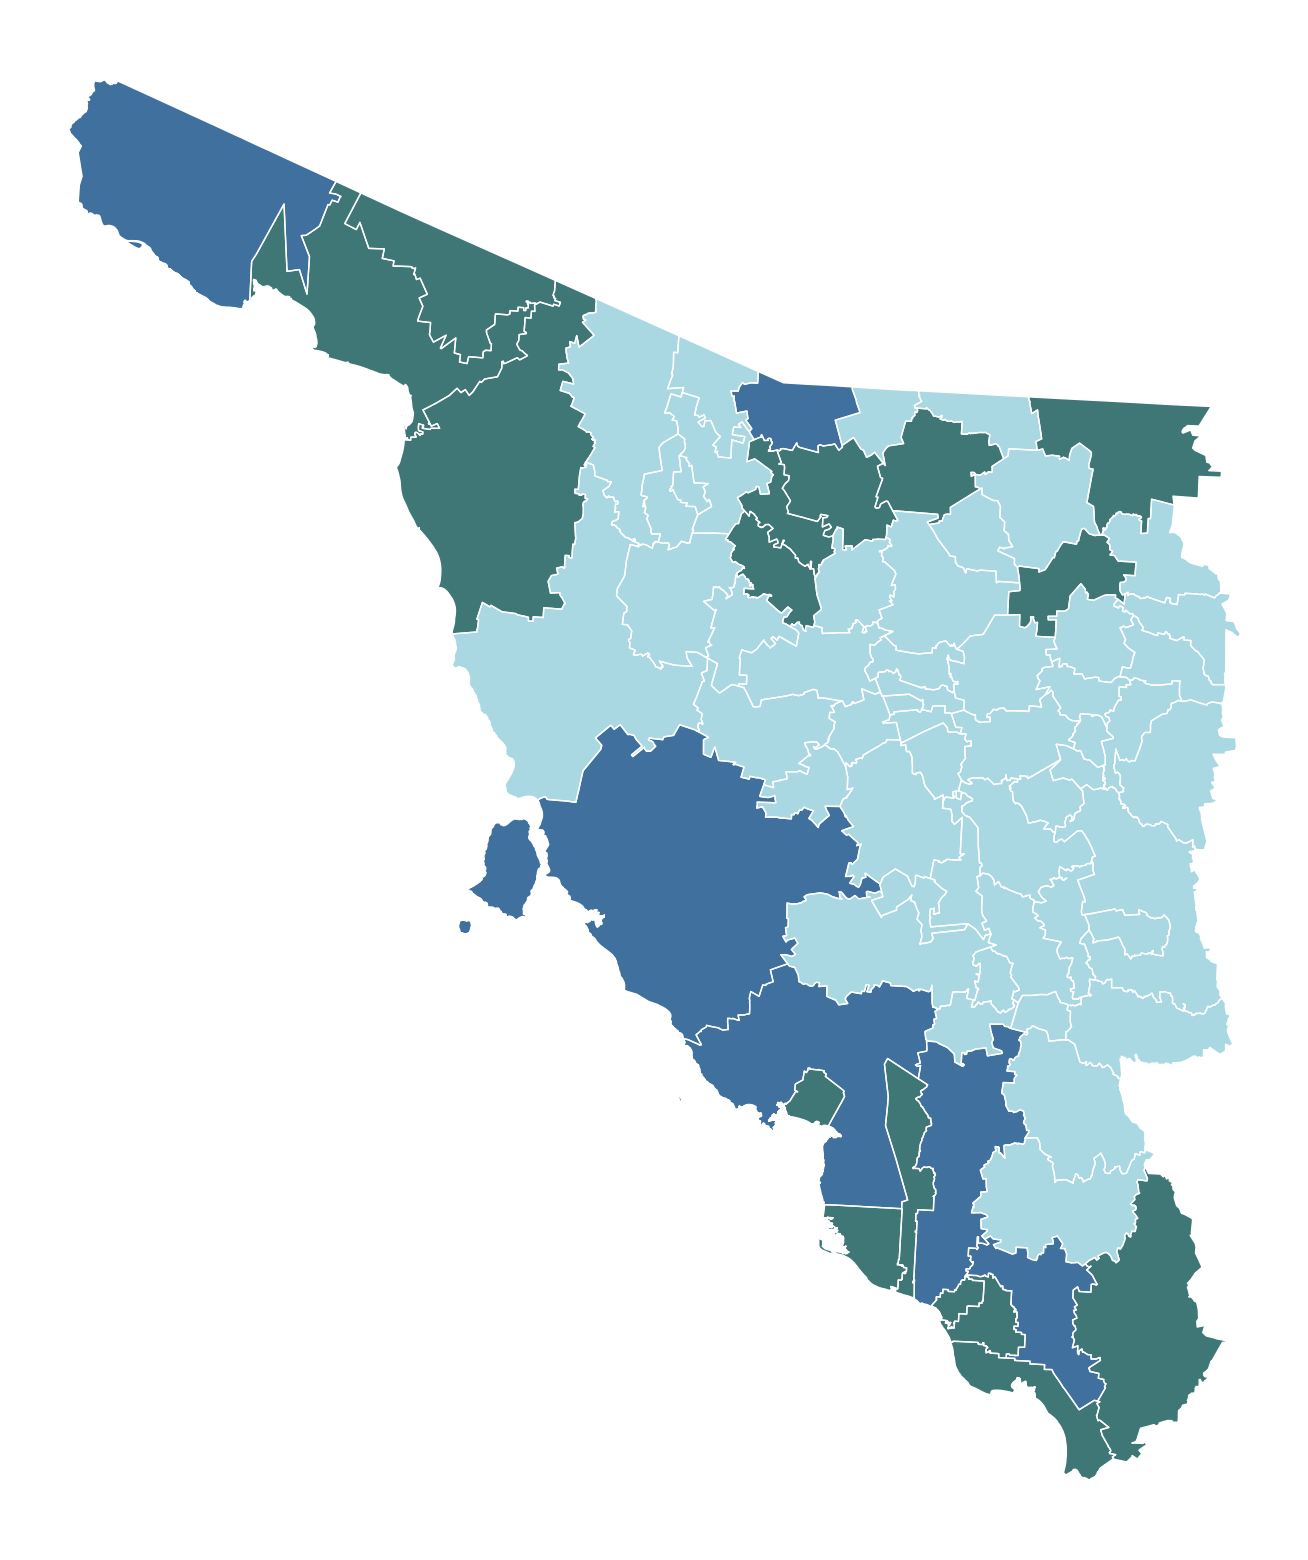

In [37]:
import sys 
import matplotlib.pyplot as plt
import mapper_colors as mapclr
sys.path.insert(1,'MAPPER\\colors')
from colors import gallery

urban_types = ['URBANOS', 'SEMI URBANOS', 'RURALES']

urban_colors = mapclr.code_values(urban_types, gallery.urban_map)
print(urban_colors)

fig1, axs = plt.subplots(figsize = (20,20))
mapclr.color_map(sonora, 'Tipo', urban_colors, axs)


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


[1, 'black', 1]


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


0

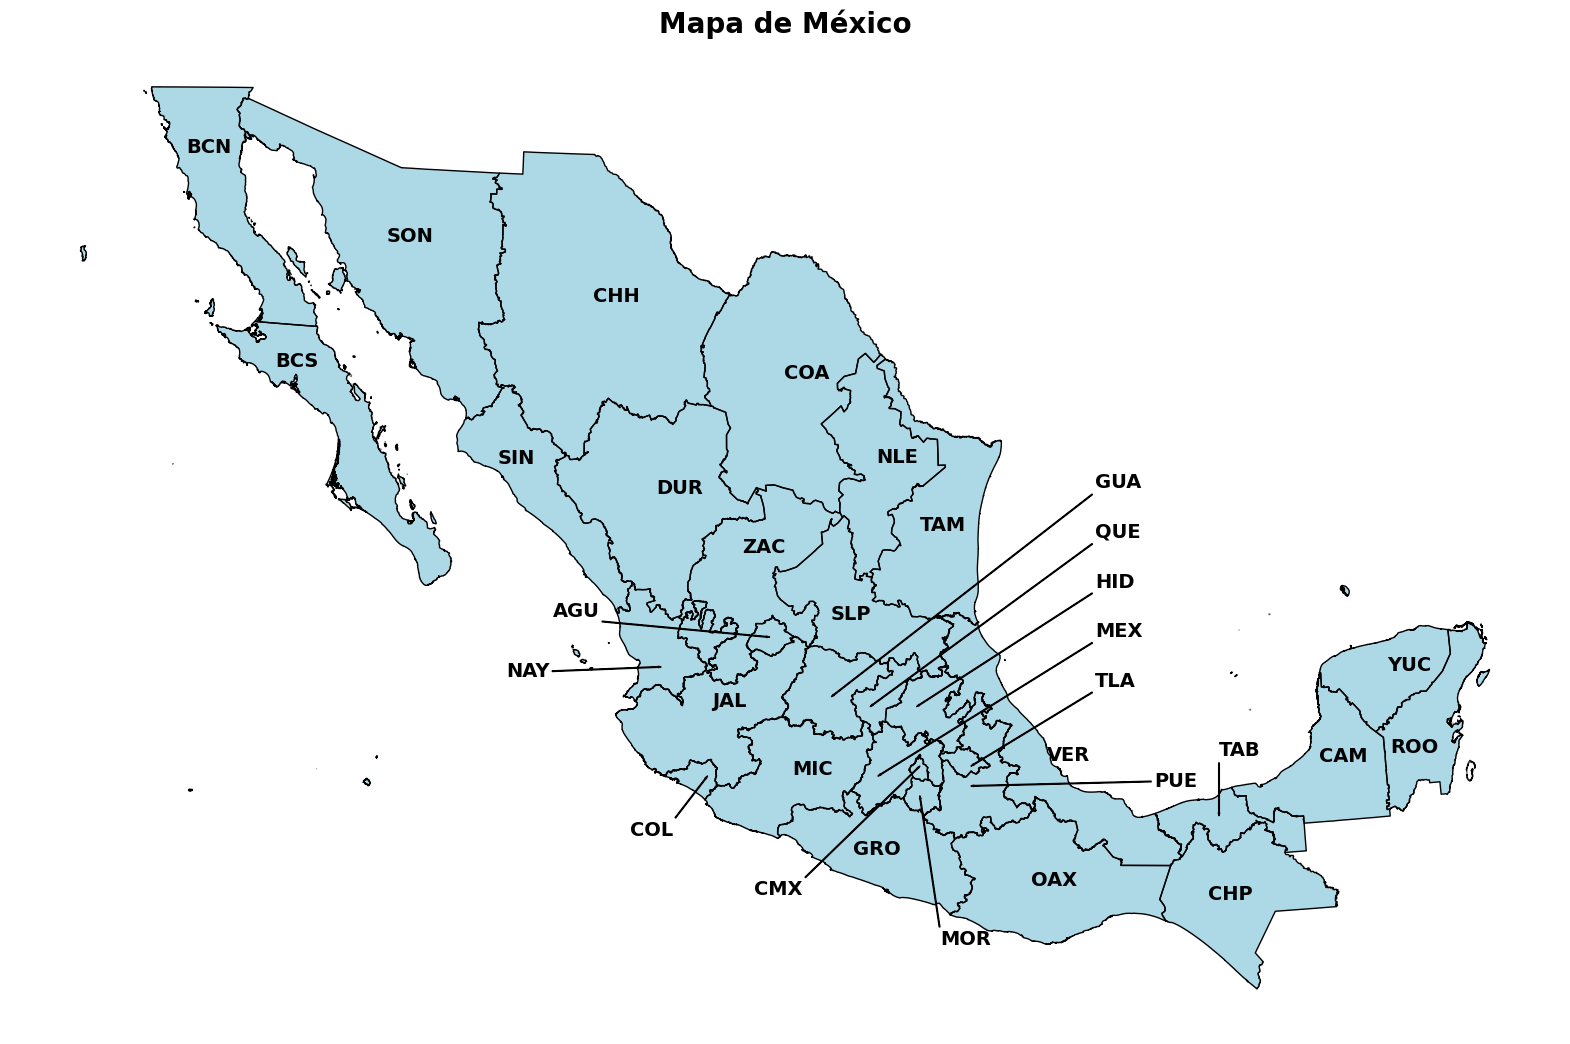

In [38]:
import mapper_addons as addon
template = pd.read_excel('templates\\00.xlsx', index_col=0)
fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(mexico, template, ax1)

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


[1, 'white', 1]


Text(1300000.0, 1680000.0, '●  Menos del 30 %')

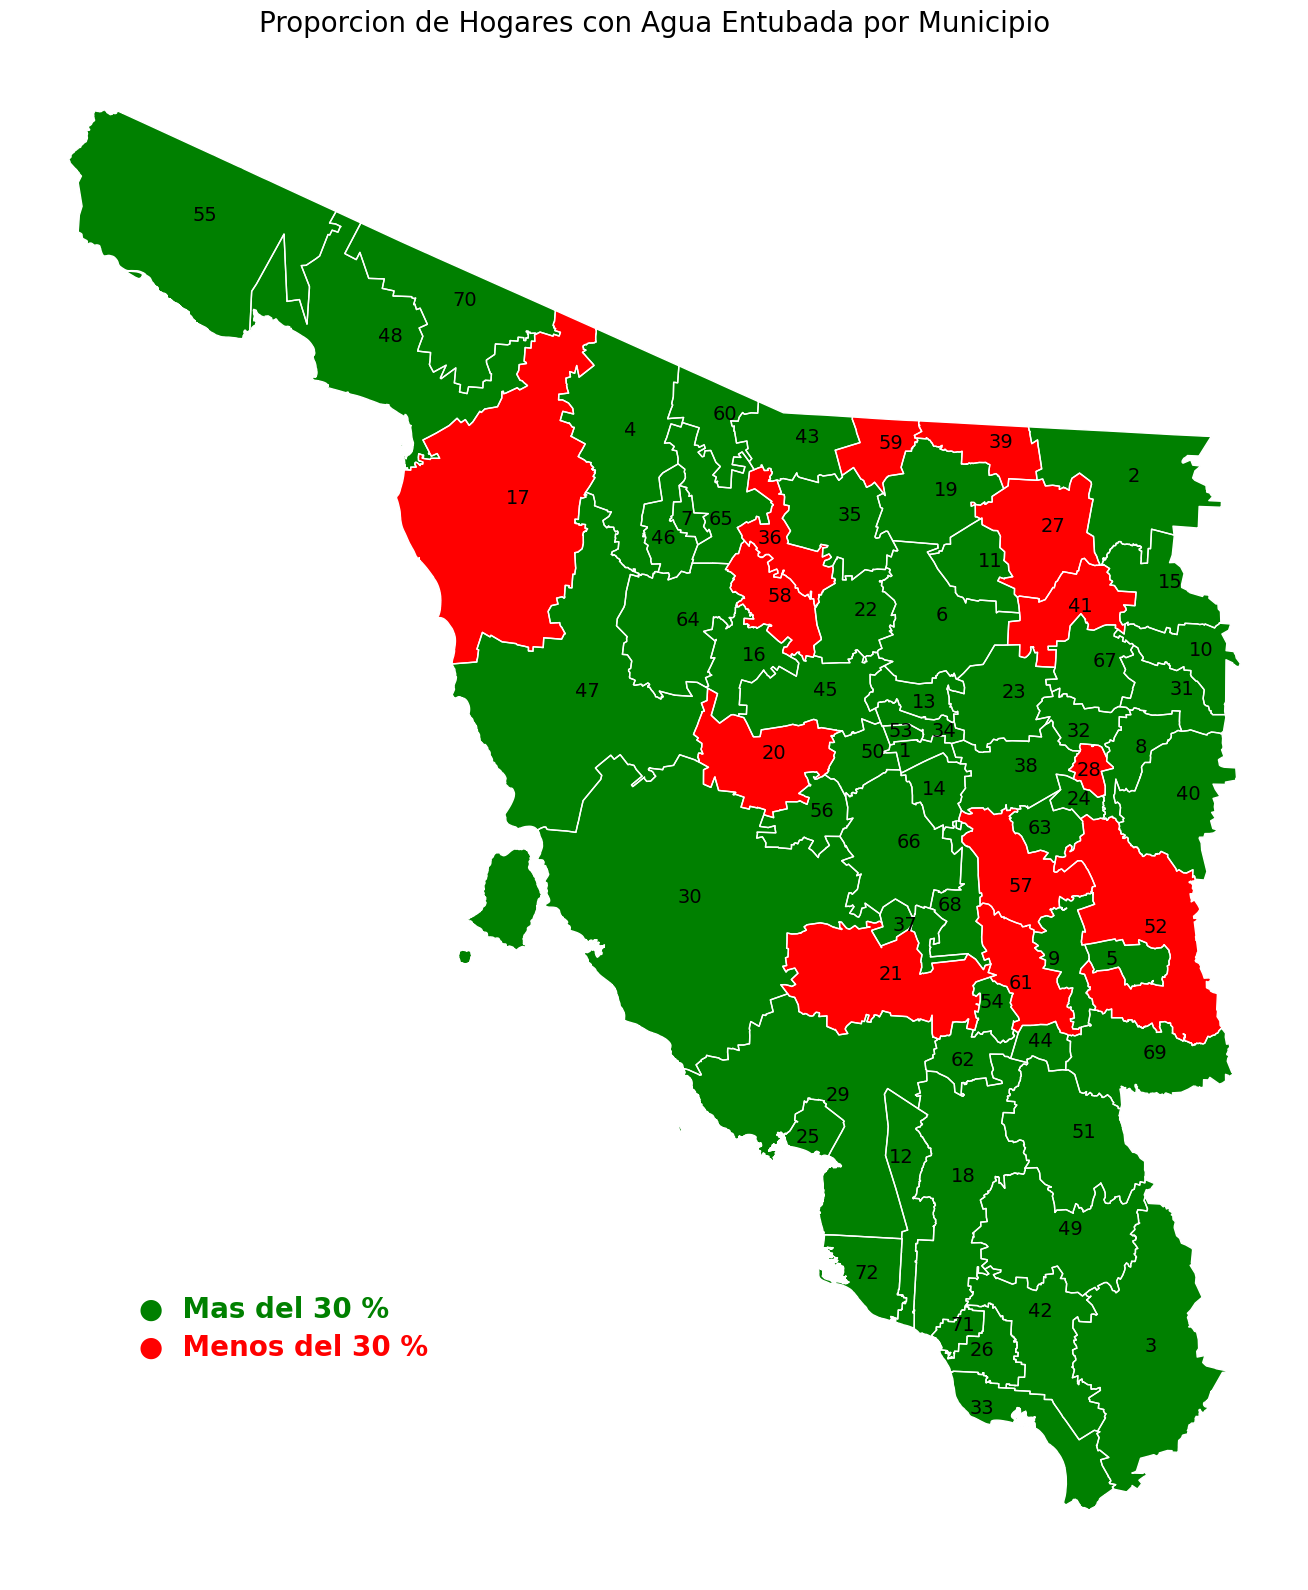

In [58]:
template = pd.read_excel('templates\\26.xlsx',index_col=0)
data1 = pd.read_excel('data\\water.xlsx',index_col=0)

data1
data1.index = template.index

template12 = template.copy()

template12['data'] = data1['<12']

color_good = 'green'
color_criter = 60
color_bad = 'red'

color_data = []
for d in template12['data']:
    if d > 30:
        color_data.append(color_good)
    else:
        color_data.append(color_bad)
template12['color_relleno'] = color_data

template12['title'] = 'Proporcion de Hogares con Agua Entubada por Municipio'
template12['title_conf'] = '20,black,None'

fig1, ax1 = plt.subplots(figsize = (20,20))
addon.read_template(sonora, template12, ax1)
ax1.annotate('●  Mas del 30 % ', xy = (1.5e6,2e6), xytext=(1.3e6,1.7e6), color = 'green', weight = 'bold', fontsize = 20)
ax1.annotate('●  Menos del 30 %', xy = (1.5e6,2e6), xytext=(1.3e6,1.68e6), color = 'red', weight = 'bold', fontsize = 20)